In [47]:
# Se importan las bibliotecas a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Agrupaciones de estrellas en el diagrama H-R

Se observa que las estrellas no se distribuyen aleatoriamente en dicho diagrama sino que
tienden a agruparse en ciertas regiones que se denominan:
∗ Secuencia Principal: Muchas estrellas caen sobre una diagonal que va desde el extremo
superior izquierdo de las estrellas muy luminosas blanco-azuladas, hasta el extremo inferior
derecho de las enanas rojas.
∗ Gigantes rojas: Son estrellas de coloración rojiza más luminosas que las de similares
colores ubicadas sobre la Secuencia Principal.
∗ Supergigantes rojas: Son estrellas de coloración rojiza o amarilla, mucho más luminosas
que las gigantes rojas.
∗ Enanas blancas: Son estrellas muy débiles pero de temperaturas superficiales altas
(típicas Ts ∼ 10000 K), de ahi su colación blancuzca. Son muy débiles por ser de
tamaños muy pequeños.

Extraido de http://www.astronomia.edu.uy/CTE2/C6.pdf


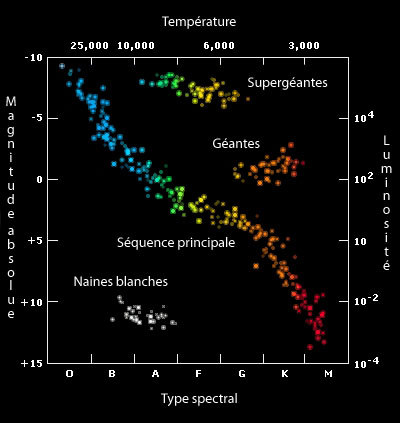

In [2]:
# Función encargada de obtener todos los datos de la base de datos de las estrellas

def obtenerDatos():
    datos = pd.read_excel('Stars database2.xlsx', header=0, nrows=6220)
    return datos

datosEstelares = obtenerDatos()

In [33]:
# Función encargada de obtener de la variable BV
def sacarBV():
    bv = datosEstelares['BV']
    return bv

# Hacemos un cambio de escala lineal para mantener la forma pero usamos la escala de temperatura que queremos
def cambiarDeEscalaBV(datosBV):
    copiaBV = np.array(datosBV)
    temperatura = copiaBV * -14000 + 30000
    return temperatura


# Función encargada de obtener la variable "p"
def sacarP():
    p = datosEstelares['p']
    return p

# Función encargada de obtner la variable "m"
def sacar_m():
    m = datosEstelares['V']
    return m

# Se guardan los datos en arreglos
BV = np.array(sacarBV())
temp = cambiarDeEscalaBV(sacarBV())
p = np.array(sacarP())
m = np.array(sacar_m())

# Se calcula el valor de la "Magnitud Absoluta"
def calcularM():
    M = m + 5 * (np.log10(p) + 1)
    return M


M = calcularM()

ax = [30000,2000]

No handles with labels found to put in legend.


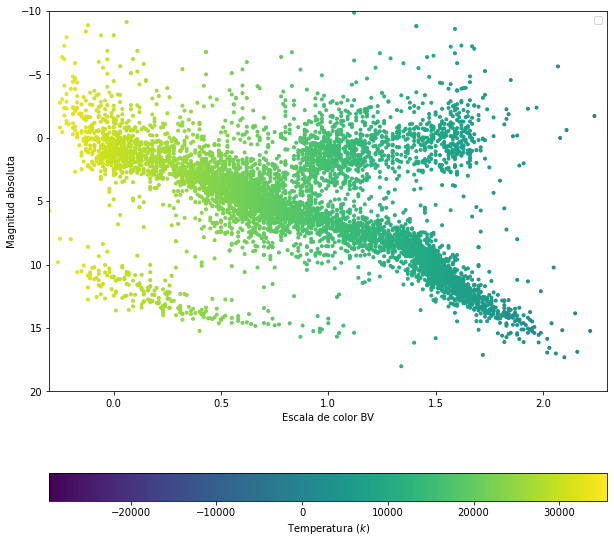

In [46]:

# Se grafica el diagrama H-R
def graficarHR():
    fig, ax = plt.subplots()
    im = ax.scatter(BV, M, marker=".", c = temp)
    ax.set_xlim(-0.3, 2.3)
    ax.set_ylabel('Magnitud absoluta')
    ax.set_xlabel('Escala de color BV')
    ax.set_ylim(20, -10)
    fig.set_size_inches(18.5, 10.5)
    plt.colorbar(im,ax=ax, label ='Temperatura $(k)$', orientation = 'horizontal')
    fig.set_size_inches(10, 10)
    plt.legend()
    plt.show()

graficarHR()
